# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Data Preprocessing

In [2]:
data_URL = "./Cleaned Data/Data.csv"

data = pd.read_csv(data_URL, index_col=0)

print(data.shape)

data.head()

(205, 53)


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_eight,cylindernumber_twelve,fuelsystem_mpfi,fuelsystem_2bbl,fuelsystem_idi,fuelsystem_1bbl,fuelsystem_spdi,fuelsystem_4bbl,fuelsystem_mfi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,1,0,0,0,0,0,0,0
2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,1,0,0,0,0,0,0,0
3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,1,0,0,0,0,0,0,0
4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,1,0,0,0,0,0,0,0
5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,1,0,0,0,0,0,0,0


## Data Scaling (Numerical)
### Standard

In [3]:
scaler = StandardScaler()

In [4]:
numerical_columns = data.columns.tolist()
numerical_columns = list(filter(lambda x: '_' not in x, numerical_columns))
scaling_columns = list(filter(lambda x: x != "price", numerical_columns))
# []"symboling", "carheight", "compressionratio", "peakrpm", "stroke"]
data[scaling_columns].head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
car_ID,,,,,,,,,,,,,,
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [5]:
standard_data = data.copy()
standard_data[scaling_columns] = scaler.fit_transform(data[scaling_columns])
standard_data[scaling_columns].head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
car_ID,,,,,,,,,,,,,,
1,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
2,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
3,0.133509,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627
4,0.938490,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354
5,0.938490,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900


### MinMax

In [6]:
scaler = MinMaxScaler()

In [7]:
numerical_columns = data.columns.tolist()
numerical_columns = list(filter(lambda x: '_' not in x, numerical_columns))
scaling_columns = list(filter(lambda x: x != "price", numerical_columns))
# ["symboling", "carheight", "compressionratio", "peakrpm", "stroke"]
data[scaling_columns].head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
car_ID,,,,,,,,,,,,,,
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [8]:
minmax_data = data.copy()
minmax_data[scaling_columns] = scaler.fit_transform(data[scaling_columns])
minmax_data[scaling_columns].head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
car_ID,,,,,,,,,,,,,,
1,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474
2,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474
3,0.6,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158
4,0.8,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421
5,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895


# Data Splitting

In [9]:
standard_X = standard_data.drop(columns="price")
standard_Y = standard_data["price"]

minmax_X = minmax_data.drop(columns="price")
minmax_Y = minmax_data["price"]

print(standard_X.shape)
print(standard_Y.shape)

(205, 52)
(205,)


In [10]:
standard_train_X, standard_test_X, standard_train_Y, standard_test_Y = train_test_split(standard_X, standard_Y, train_size=0.8, test_size=0.2, shuffle=True)
minmax_train_X, minmax_test_X, minmax_train_Y, minmax_test_Y = train_test_split(minmax_X, minmax_Y, train_size=0.8, test_size=0.2, shuffle=True)

In [11]:
print(standard_train_X.shape, standard_train_Y.shape)
print(standard_test_X.shape, standard_test_Y.shape)

(164, 52) (164,)
(41, 52) (41,)


# Models
## Model 1 (Naive Standard Scale)

In [12]:
model1 = LinearRegression()
model1.fit(standard_train_X, standard_train_Y)

model1_pred_train = model1.predict(standard_train_X)
model1_pred_test = model1.predict(standard_test_X)

model1_train_mse = mean_squared_error(standard_train_Y, model1_pred_train, squared=False)
model1_test_mse = mean_squared_error(standard_test_Y, model1_pred_test, squared=False)

model1_train_r2 = r2_score(standard_train_Y, model1_pred_train) * 100
model1_test_r2 = r2_score(standard_test_Y, model1_pred_test) * 100

print("Train MSE:", model1_train_mse)
print("Test MSE:", model1_test_mse)

print("Train r2:", model1_train_r2)
print("Test r2:", model1_test_r2)

Train MSE: 1985.9027392307719
Test MSE: 2170.043488031988
Train r2: 94.53742027123366
Test r2: 78.75903008187304


## Model 2 (Remove Unnecessary Features Standard Scale)

In [13]:
useful_standard_train_X = standard_train_X.drop(columns=["symboling", "carheight", "compressionratio", "peakrpm", "stroke"])
useful_standard_test_X = standard_test_X.drop(columns=["symboling", "carheight", "compressionratio", "peakrpm", "stroke"])

In [14]:
model2 = LinearRegression()
model2.fit(useful_standard_train_X, standard_train_Y)

model2_pred_train = model2.predict(useful_standard_train_X)
model2_pred_test = model2.predict(useful_standard_test_X)

model2_train_mse = mean_squared_error(standard_train_Y, model2_pred_train, squared=False)
model2_test_mse = mean_squared_error(standard_test_Y, model2_pred_test, squared=False)

model2_train_r2 = r2_score(standard_train_Y, model2_pred_train) * 100
model2_test_r2 = r2_score(standard_test_Y, model2_pred_test) * 100

print("Train MSE:", model2_train_mse)
print("Test MSE:", model2_test_mse)

print("Train r2:", model2_train_r2)
print("Test r2:", model2_test_r2)

Train MSE: 2254.294589928558
Test MSE: 2144.0742983238515
Train r2: 92.96112623586114
Test r2: 79.2643749579824


## Model 3 (Log transform Y Standard Scale)

In [15]:
model3 = LinearRegression()
model3.fit(standard_train_X, np.log(standard_train_Y))

model3_pred_train = model3.predict(standard_train_X)
model3_pred_test = model3.predict(standard_test_X)

model3_train_mse = mean_squared_error(np.log(standard_train_Y), model3_pred_train, squared=False)
model3_test_mse = mean_squared_error(np.log(standard_test_Y), model3_pred_test, squared=False)

model3_train_r2 = r2_score(np.log(standard_train_Y), model3_pred_train) * 100
model3_test_r2 = r2_score(np.log(standard_test_Y), model3_pred_test) * 100

print("Train MSE:", model3_train_mse)
print("Test MSE:", model3_test_mse)

print("Train r2:", model3_train_r2)
print("Test r2:", model3_test_r2)

Train MSE: 0.11432270412707249
Test MSE: 0.18084183316094388
Train r2: 95.12807591235003
Test r2: 80.36806489365568


## Model 4 (All of the Above)

In [16]:
useful_standard_train_X = standard_train_X.drop(columns=["symboling", "carheight", "compressionratio", "peakrpm", "stroke"])
useful_standard_test_X = standard_test_X.drop(columns=["symboling", "carheight", "compressionratio", "peakrpm", "stroke"])

In [17]:
model4 = LinearRegression()
model4.fit(useful_standard_train_X, np.log(standard_train_Y))

model4_pred_train = model4.predict(useful_standard_train_X)
model4_pred_test = model4.predict(useful_standard_test_X)

model4_train_mse = mean_squared_error(np.log(standard_train_Y), model4_pred_train, squared=False)
model4_test_mse = mean_squared_error(np.log(standard_test_Y), model4_pred_test, squared=False)

model4_train_r2 = r2_score(np.log(standard_train_Y), model4_pred_train) * 100
model4_test_r2 = r2_score(np.log(standard_test_Y), model4_pred_test) * 100

print("Train MSE:", model4_train_mse)
print("Test MSE:", model4_test_mse)

print("Train r2:", model4_train_r2)
print("Test r2:", model4_test_r2)

Train MSE: 0.12173812911688764
Test MSE: 0.1814022890318628
Train r2: 94.47555337290083
Test r2: 80.24619173181371


## Model 5 (Naive MinMax Scale)

In [18]:
model5 = LinearRegression()
model5.fit(minmax_train_X, minmax_train_Y)

model5_pred_train = model5.predict(minmax_train_X)
model5_pred_test = model5.predict(minmax_test_X)

model5_train_mse = mean_squared_error(minmax_train_Y, model5_pred_train, squared=False)
model5_test_mse = mean_squared_error(minmax_test_Y, model5_pred_test, squared=False)

model5_train_r2 = r2_score(minmax_train_Y, model5_pred_train) * 100
model5_test_r2 = r2_score(minmax_test_Y, model5_pred_test) * 100

print("Train MSE:", model2_train_mse)
print("Test MSE:", model2_test_mse)

print("Train r2:", model2_train_r2)
print("Test r2:", model2_test_r2)

Train MSE: 2254.294589928558
Test MSE: 2144.0742983238515
Train r2: 92.96112623586114
Test r2: 79.2643749579824


## Model 6 (Remove Unnecessary Feature MinMax Scale)

In [19]:
useful_minmax_train_X = minmax_train_X.drop(columns=["symboling", "carheight", "compressionratio", "peakrpm", "stroke"])
useful_minmax_test_X = minmax_test_X.drop(columns=["symboling", "carheight", "compressionratio", "peakrpm", "stroke"])

In [20]:
model6 = LinearRegression()
model6.fit(useful_minmax_train_X, minmax_train_Y)

model6_pred_train = model6.predict(useful_minmax_train_X)
model6_pred_test = model6.predict(useful_minmax_test_X)

model6_train_mse = mean_squared_error(minmax_train_Y, model6_pred_train, squared=False)
model6_test_mse = mean_squared_error(minmax_test_Y, model6_pred_test, squared=False)

model6_train_r2 = r2_score(minmax_train_Y, model6_pred_train) * 100
model6_test_r2 = r2_score(minmax_test_Y, model6_pred_test) * 100

print("Train MSE:", model6_train_mse)
print("Test MSE:", model6_test_mse)

print("Train r2:", model6_train_r2)
print("Test r2:", model6_test_r2)

Train MSE: 2203.6778549410387
Test MSE: 2253.9219042830264
Train r2: 92.53649471103455
Test r2: 90.89125261549027


## Model 7 (Log Transform Y MinMax Scale)

In [21]:
model7 = LinearRegression()
model7.fit(minmax_train_X, np.log(minmax_train_Y))

model7_pred_train = model7.predict(minmax_train_X)
model7_pred_test = model7.predict(minmax_test_X)

model7_train_mse = mean_squared_error(np.log(minmax_train_Y), model7_pred_train, squared=False)
model7_test_mse = mean_squared_error(np.log(minmax_test_Y), model7_pred_test, squared=False)

model7_train_r2 = r2_score(np.log(minmax_train_Y), model7_pred_train) * 100
model7_test_r2 = r2_score(np.log(minmax_test_Y), model7_pred_test) * 100

print("Train MSE:", model7_train_mse)
print("Test MSE:", model7_test_mse)

print("Train r2:", model7_train_r2)
print("Test r2:", model7_test_r2)

Train MSE: 0.12610500125138022
Test MSE: 0.12794089230196484
Train r2: 93.84498690234338
Test r2: 92.62948050330453


## Model 8 (All of the Above MinMax Scale)

In [22]:
useful_minmax_train_X = minmax_train_X.drop(columns=["symboling", "carheight", "compressionratio", "peakrpm", "stroke"])
useful_minmax_test_X = minmax_test_X.drop(columns=["symboling", "carheight", "compressionratio", "peakrpm", "stroke"])

In [23]:
model8 = LinearRegression()
model8.fit(useful_minmax_train_X, np.log(minmax_train_Y))

model8_pred_train = model8.predict(useful_minmax_train_X)
model8_pred_test = model8.predict(useful_minmax_test_X)

model8_train_mse = mean_squared_error(np.log(minmax_train_Y), model8_pred_train, squared=False)
model8_test_mse = mean_squared_error(np.log(minmax_test_Y), model8_pred_test, squared=False)

model8_train_r2 = r2_score(np.log(minmax_train_Y), model8_pred_train) * 100
model8_test_r2 = r2_score(np.log(minmax_test_Y), model8_pred_test) * 100

print("Train MSE:", model8_train_mse)
print("Test MSE:", model8_test_mse)

print("Train r2:", model8_train_r2)
print("Test r2:", model8_test_r2)

Train MSE: 0.1319628127299388
Test MSE: 0.1327349051887999
Train r2: 93.25988219301988
Test r2: 92.0667774694132


In [24]:
# Need to first find coefficients to determine most important features
# For plotting... only use single column at a time in X placement for scatterplot

coeffs8 = model8.coef_
print(coeffs8)

coeffs8_mag = abs(coeffs8)
coeffs8_mag_temp = coeffs8_mag
max_coeffs8_mag_ind = []
num_imp_coeffs = 47
for i in range(num_imp_coeffs):
    maxcoeff8 = np.argmax(coeffs8_mag_temp)
    max_coeffs8_mag_ind.append(maxcoeff8)
    coeffs8_mag_temp[maxcoeff8] = 0

print(max_coeffs8_mag_ind)
print(coeffs8[max_coeffs8_mag_ind])

# Visualize structure of training data
list(useful_minmax_train_X.columns)b

[ 0.27923554  0.16060005  0.27194659  0.8709301  -0.26250337  0.0051667
  0.95157123 -0.78862859  0.73102228 -0.05088094  0.03253117  0.01834977
 -0.01276283 -0.07706714 -0.09114824 -0.06065054  0.24162875 -0.0370759
  0.0370759  -0.02034598  0.02034598  0.0131462  -0.0131462  -0.18678172
  0.18678172  0.22891481  0.20708345 -0.04072367  0.09685315  0.06222444
  0.04319128 -0.59754346  0.04319128  0.07502547 -0.277734   -0.11170067
 -0.04001814  0.33585109 -0.02461502  0.03109261 -0.03036442  0.0370759
  0.09668173 -0.06347562 -0.03955495 -0.03145525  0.        ]
[6, 3, 7, 8, 31, 37, 0, 34, 2, 4, 16, 25, 26, 23, 24, 1, 35, 28, 42, 14, 13, 33, 43, 29, 15, 9, 30, 32, 27, 36, 44, 17, 18, 41, 10, 45, 39, 40, 38, 20, 19, 11, 22, 21, 12, 5, 0]
[ 0.95157123  0.8709301  -0.78862859  0.73102228 -0.59754346  0.33585109
  0.27923554 -0.277734    0.27194659 -0.26250337  0.24162875  0.22891481
  0.20708345 -0.18678172  0.18678172  0.16060005 -0.11170067  0.09685315
  0.09668173 -0.09114824 -0.07706

['wheelbase',
 'carlength',
 'carwidth',
 'curbweight',
 'enginesize',
 'boreratio',
 'horsepower',
 'citympg',
 'highwaympg',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'drivewheel_4wd',
 'carbody_sedan',
 'carbody_hatchback',
 'carbody_wagon',
 'carbody_hardtop',
 'carbody_convertible',
 'fueltype_gas',
 'fueltype_diesel',
 'aspiration_std',
 'aspiration_turbo',
 'doornumber_two',
 'doornumber_four',
 'enginelocation_front',
 'enginelocation_rear',
 'enginetype_ohc',
 'enginetype_ohcf',
 'enginetype_ohcv',
 'enginetype_dohc',
 'enginetype_l',
 'enginetype_rotor',
 'enginetype_dohcv',
 'cylindernumber_two',
 'cylindernumber_three',
 'cylindernumber_four',
 'cylindernumber_five',
 'cylindernumber_six',
 'cylindernumber_eight',
 'cylindernumber_twelve',
 'fuelsystem_mpfi',
 'fuelsystem_2bbl',
 'fuelsystem_idi',
 'fuelsystem_1bbl',
 'fuelsystem_spdi',
 'fuelsystem_4bbl',
 'fuelsystem_mfi',
 'fuelsystem_spfi']

Text(0.5, 1.0, 'Coefficients of Each Feature')

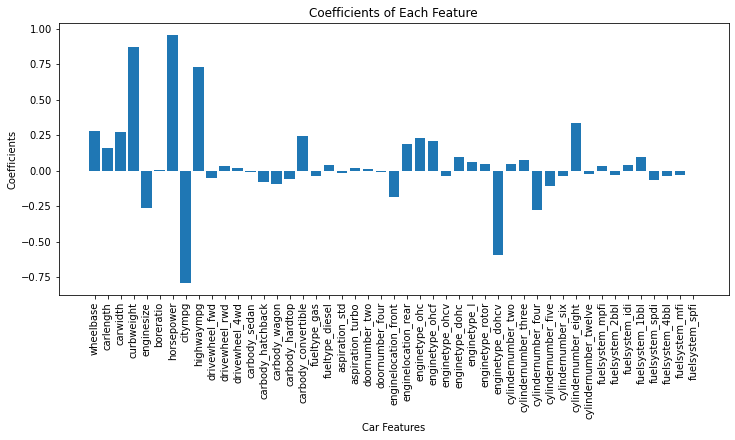

In [25]:
import matplotlib.pyplot as plt

#Histogram of all the features and there weights
plt.figure(figsize=(12,5))
plt.bar(useful_minmax_train_X.columns,coeffs8)
plt.xlabel('Car Features')
plt.xticks(rotation=90)
plt.ylabel('Coefficients')
plt.title('Coefficients of Each Feature')

Text(0.5, 1.0, 'Coefficients of Each Feature')

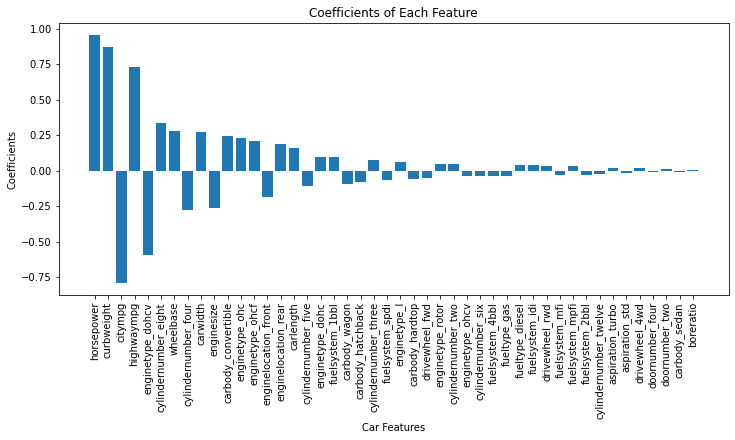

In [26]:
#Histogram of all the features and there weights (ordered)
plt.figure(figsize=(12,5))
plt.bar(useful_minmax_train_X.columns[max_coeffs8_mag_ind],coeffs8[max_coeffs8_mag_ind])
plt.xlabel('Car Features')
plt.xticks(rotation=90)
plt.ylabel('Coefficients')
plt.title('Coefficients of Each Feature')